## Coffee roasting model implementation of neural networks using NumPy

here we are going to build a model to predict wheter coffee is roasted correctly based on input features temperature and time

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

ignore the above function its just used to generate the dataset

In [3]:
x_train,y_train = load_coffee_data()

In [4]:
print(x_train.shape,y_train.shape)

(200, 2) (200, 1)


### Normalization

In [5]:
print("Before Normalization")
print(f"max temperature = {np.max(x_train[0])} \t min temperature ={np.min(x_train[0])}")
print(f"max duration = {np.max(x_train[1])} \t min duration ={np.min(x_train[1])}")

Before Normalization
max temperature = 185.31763812365773 	 min temperature =12.693964573656494
max duration = 259.9204749802278 	 min duration =11.867663768540387


In [6]:
import tensorflow as tf

In [7]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(x_train)
norm_x = norm(x_train)
print("After Normalization")
print(f"max temperature = {np.max(norm_x[0])} \t min temperature ={np.min(norm_x[0])}")
print(f"max duration = {np.max(norm_x[1])} \t min duration ={np.min(norm_x[1])}")


After Normalization
max temperature = -0.6528791785240173 	 min temperature =-0.8345550894737244
max duration = 1.032305121421814 	 min duration =-1.3851453065872192


## Numpy Model (Forward Prop in NumPy)
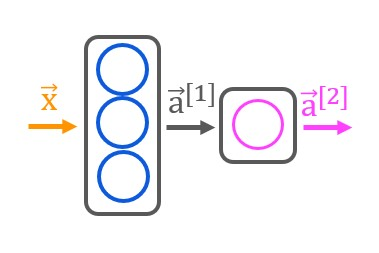

In [8]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [9]:
def dense(a_in,w,b):
    units = w.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w_ = w[:,j]                                    
        z = np.dot(w_, a_in) + b[j]         
        a_out[j] = sigmoid(z)
    return a_out

In [10]:
def sequential(x,w1,b1,w2,b2):
    a1 = dense(x,w1,b1)
    a2 = dense(a1,w2,b2)
    return a2

In [11]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [12]:
def predict(x,w1,b1,w2,b2):
    m = x.shape[0]
    p = np.zeros((m,1))
    for j in range(m):
        p[j,0] = sequential(x[j],w1,b1,w2,b2)
    return p

In [13]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm(X_tst)  # remember to normalize
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

#### Predictions

In [14]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]
